# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [6]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [7]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [8]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [9]:
df_train.shape

(15223, 52)

In [10]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [11]:
df_test.shape

(14910, 52)

In [12]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [13]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,0,1,1,1,5,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [14]:
# команда создания нового столбца и присвоения им значений

df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [15]:
# append добавляет таблицу train в конец таблицы test
df = df_test.append(df_train).reset_index(drop=True)

In [16]:
#всего получилось строк
df.shape

(30133, 53)

In [17]:
df.head(20000)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [19]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Два и более высших образования', 'Среднее специальное', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Неполное среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'СМИ/Реклама/PR-агенства', 'Государственная служба', 'Банк/Финансы', 'Торговля', 'Сборочные производства', 'Строительство', 'Маркетинг', 'Подбор персонала', 'Логистика', 'ЧОП/Детективная д-ть', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Развлечения/Искусство', 'Наука', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'Управляющая компания', 'Сельское хозяйство', 'Нефтегазовая промышленность', 'Туризм', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Информационные услуги', 'Недвижимость', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Страхование', 'Образование', 'Энергетика'}


GEN_TITLE


In [20]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Два и более высших образования', 'Среднее специальное', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Неполное среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'СМИ/Реклама/PR-агенства', 'Государственная служба', 'Банк/Финансы', 'Торговля', 'Сборочные производства', 'Строительство', 'Маркетинг', 'Подбор персонала', 'Логистика', 'ЧОП/Детективная д-ть', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Развлечения/Искусство', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'Управляющая компания', 'Сельское хозяйство', 'Нефтегазовая промышленность', 'Туризм', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Информационные услуги', 'Недвижимость', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Страхование', 'Образование', 'Энергетика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [21]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [22]:
Пропуски есть: 
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
TP_PROVINCE                   29543 non-null object
REGION_NM                     30131 non-null object
WORK_TIME                     27416 non-null float64
PREVIOUS_CARD_NUM_UTILIZED    600   non-null float64

object можно категорировать присвоив числовое значение, для пропуска указать например "-1", что бы эти данные не искажали расчёты


пропуск WORK_TIME  можно заменить средним значением или -1
пропуск PREVIOUS_CARD_NUM_UTILIZED - подсказка в файле, что пустое значение  = 0




SyntaxError: invalid syntax (<ipython-input-22-bb0772525f19>, line 1)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [23]:
Да, есть, например:

заменить на числовые значения - категорировать                                          
EDUCATION                     
MARITAL_STATUS    
GEN_INDUSTRY  
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR



исключить как малоинформативные
REG_ADDRESS_PROVINCE          
FACT_ADDRESS_PROVINCE         
POSTAL_ADDRESS_PROVINCE       
TP_PROVINCE                   
REGION_NM                     



SyntaxError: invalid syntax (<ipython-input-23-d7d782bc30a7>, line 1)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [24]:
import numpy as np

In [25]:
def preproc_data(df_input):
    
    df_Noutput = df_input.copy()
    
    # Удалить признаки
    df_Noutput = df_Noutput.drop(['AGREEMENT_RK'], axis=1)
    
    df_Noutput = df_Noutput.drop(['REG_ADDRESS_PROVINCE'], axis=1)
    df_Noutput = df_Noutput.drop(['FACT_ADDRESS_PROVINCE'],axis=1)
    df_Noutput = df_Noutput.drop(['POSTAL_ADDRESS_PROVINCE'], 1)
    df_Noutput = df_Noutput.drop(['TP_PROVINCE'], 1)
    df_Noutput = df_Noutput.drop(['REGION_NM'], 1)

    
    #замена ','
    df_Noutput.loc[:,  ['PERSONAL_INCOME']] = \
    df_Noutput.loc[:,  'PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_Noutput.loc[:,  ['CREDIT']] = \
    df_Noutput.loc[:,  'CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_Noutput.loc[:,  ['FST_PAYMENT']] = \
    df_Noutput.loc[:,  'FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_Noutput.loc[:,  ['LOAN_AVG_DLQ_AMT']] = \
    df_Noutput.loc[:,  'LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_Noutput.loc[:,  ['LOAN_MAX_DLQ_AMT']] = \
    df_Noutput.loc[:,  'LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
 
    
    df_Noutput['PREVIOUS_CARD_NUM_UTILIZED'] = df_Noutput['PREVIOUS_CARD_NUM_UTILIZED'].replace(np.nan, 0)
    
       
    
    # Замена категориальных признаков
        
    df_Noutput.loc[:,  ['EDUCATION']] = \
    df_Noutput.loc[:,  ['EDUCATION']].replace({'Неполное среднее': 0,
                                               'Среднее': 1, 
                                               'Среднее специальное': 2, 
                                               'Неоконченное высшее': 3,
                                               'Высшее': 4, 
                                               'Два и более высших образования': 5,
                                               'Ученая степень': 6 })
    
    df_Noutput.loc[:,  ['MARITAL_STATUS']] = \
    df_Noutput.loc[:,  ['MARITAL_STATUS']].replace({'Не состоял в браке': 0,
                                               'Гражданский брак': 1, 
                                               'Состою в браке': 2, 
                                               'Вдовец/Вдова': 3,
                                               'Разведен(а)': 4 })
    
    df_Noutput.loc[:,  ['GEN_INDUSTRY']] = \
    df_Noutput.loc[:,  ['GEN_INDUSTRY']].replace({
                                               'Другие сферы': 1, 
                                               'СМИ/Реклама/PR-агенства': 2, 
                                               'Государственная служба': 3,
                                               'Развлечения/Искусство': 4, 
                                               'Недвижимость': 5,
                                               'Торговля': 6,
                                               'ЧОП/Детективная д-ть': 7,
                                               'Логистика': 8, 
                                               'Информационные услуги': 9,
                                               'Здравоохранение': 10, 'Энергетика': 11, 'Наука': 12, 'Ресторанный бизнес/Общественное питание': 13, 
                                               'Информационные технологии': 14, 'Строительство': 15, 'Салоны красоты и здоровья': 16, 
                                               'Сборочные производства': 17, 'Туризм': 18, 'Сельское хозяйство': 19, 'Подбор персонала': 20, 
                                               'Управляющая компания': 21, 'Юридические услуги/нотариальные услуги': 22, 
                                               'Нефтегазовая промышленность': 23, 'Металлургия/Промышленность/Машиностроение': 24, 
                                               'Транспорт': 25, 'Химия/Парфюмерия/Фармацевтика': 26, 'Маркетинг': 27, 'Страхование': 28, 
                                               'Коммунальное хоз-во/Дорожные службы': 29, 'Образование': 30, 'Банк/Финансы': 31})
 

    df_Noutput.loc[:,  ['GEN_TITLE']] = \
    df_Noutput.loc[:,  ['GEN_TITLE']].replace({ 
                                                  'Партнер': 0, 
                                                  'Руководитель среднего звена': 1, 
                                                  'Работник сферы услуг': 2, 
                                                  'Служащий': 3, 
                                                  'Руководитель высшего звена': 4, 
                                                  'Индивидуальный предприниматель': 5, 
                                                  'Высококвалифиц. специалист': 6, 
                                                  'Специалист': 7, 
                                                  'Другое': 8, 
                                                  'Рабочий': 9, 
                                                  'Руководитель низшего звена': 10, 
                                                  'Военнослужащий по контракту': 11})
     

    df_Noutput.loc[:,  ['ORG_TP_STATE']] = \
    df_Noutput.loc[:,  ['ORG_TP_STATE']].replace({
                                                 'Частная компания': 0, 
                                                 'Некоммерческая организация': 1, 
                                                 'Индивидуальный предприниматель': 2, 
                                                 'Частная ком. с инос. капиталом': 3, 
                                                 'Государственная комп./учреж.': 4})

    df_Noutput.loc[:,  ['ORG_TP_FCAPITAL']] = \
    df_Noutput.loc[:,  ['ORG_TP_FCAPITAL']].replace({
                                                  'С участием': 0, 
                                                  'Без участия': 1})

    df_Noutput.loc[:,  ['JOB_DIR']] = \
    df_Noutput.loc[:,  ['JOB_DIR']].replace({
                                                     'Вспомогательный техперсонал': 0, 
                                                     'Снабжение и сбыт': 1, 
                                                     'Служба безопасности': 2, 
                                                     'Реклама и маркетинг': 3, 
                                                     'Адм-хоз. и трансп. службы': 4, 
                                                     'Участие в основ. деятельности': 5, 
                                                     'Кадровая служба и секретариат': 6, 
                                                     'Пр-техн. обесп. и телеком.': 7, 
                                                     'Юридическая служба': 8, 
                                                     'Бухгалтерия, финансы, планир.': 9})

    df_Noutput.loc[:,  ['FAMILY_INCOME']] = \
    df_Noutput.loc[:,  ['FAMILY_INCOME']].replace({  'до 5000 руб.': 0,
                                                     'от 5000 до 10000 руб.': 1,
                                                     'от 10000 до 20000 руб.': 2, 
                                                     'от 20000 до 50000 руб.': 3, 
                                                     'свыше 50000 руб.': 4})         
    
    
   # df_Noutput.loc[:,  ['sample']] = \
   # df_Noutput.loc[:,  ['sample']].replace({ 'test': 0,'train': 1})
    
    df_Noutput = df_Noutput.fillna(-1)
    
   # df_Noutput['GEN_INDUSTRY'] = df_Noutput['GEN_INDUSTRY'].replace(np.nan, -1)
   # for whole dataframe
   # df_Noutput = df_Noutput.replace(np.nan, -1)

    
    return df_Noutput

In [26]:
df_Nouti = df.pipe(preproc_data)

In [27]:
df_Nouti.head(10)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,30,1,0,1,1,1,2,0,30.0,...,1,2,2,8,0,0,0.0,0.0,0.0,test
1,0,48,0,1,1,0,0,1,2,-1.0,...,0,2,1,15,0,0,0.0,0.0,0.0,test
2,0,35,1,0,0,1,0,1,0,24.0,...,1,1,1,1,0,0,0.0,0.0,0.0,test
3,0,22,1,0,0,0,0,1,0,1.0,...,1,3,2,9,0,0,0.0,0.0,0.0,test
4,0,27,1,0,1,2,2,4,2,30.0,...,1,1,1,5,0,0,0.0,0.0,0.0,test
5,0,44,0,1,0,2,2,2,2,-1.0,...,0,1,1,5,0,0,0.0,0.0,0.0,test
6,0,57,1,0,1,0,0,1,0,17.0,...,1,3,3,14,0,0,0.0,0.0,0.0,test
7,0,33,1,0,1,2,2,2,4,30.0,...,1,1,1,5,0,0,0.0,0.0,0.0,test
8,0,53,0,1,1,2,0,2,2,-1.0,...,0,1,1,4,0,0,0.0,0.0,0.0,test
9,1,33,1,0,0,1,0,0,2,6.0,...,1,1,1,6,0,0,0.0,0.0,0.0,test


In [28]:
df_Nouti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 47 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null float64
GEN_TITLE                     30133 non-null float64
ORG_TP_STATE                  30133 non-null float64
ORG_TP_FCAPITAL               30133 non-null float64
JOB_DIR                       30133 non-null float64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL

In [29]:
df_Nouti.isnull().sum()

TARGET                        0
AGE                           0
SOCSTATUS_WORK_FL             0
SOCSTATUS_PENS_FL             0
GENDER                        0
CHILD_TOTAL                   0
DEPENDANTS                    0
EDUCATION                     0
MARITAL_STATUS                0
GEN_INDUSTRY                  0
GEN_TITLE                     0
ORG_TP_STATE                  0
ORG_TP_FCAPITAL               0
JOB_DIR                       0
FAMILY_INCOME                 0
PERSONAL_INCOME               0
REG_FACT_FL                   0
FACT_POST_FL                  0
REG_POST_FL                   0
REG_FACT_POST_FL              0
REG_FACT_POST_TP_FL           0
FL_PRESENCE_FL                0
OWN_AUTO                      0
AUTO_RUS_FL                   0
HS_PRESENCE_FL                0
COT_PRESENCE_FL               0
GAR_PRESENCE_FL               0
LAND_PRESENCE_FL              0
CREDIT                        0
TERM                          0
FST_PAYMENT                   0
DL_DOCUM

In [30]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [31]:
df_preproc.head(1)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,30,1,0,1,1,1,2,0,30.0,...,1,2,2,8,0,0,0.0,0.0,0.0,test


In [32]:
df_train_preproc.head(1)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
14910,0,49,1,0,1,2,1,2,2,6.0,...,0,1,1,1,6,2,1,1580.0,1580.0,0.0


In [33]:
df_test_preproc.head(1)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,0,30,1,0,1,1,1,2,0,30.0,...,0,1,2,2,8,0,0,0.0,0.0,0.0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [34]:
#выдавать оценку склонности клиента к положительному отклику по его признаковому описанию. 
#Эта оценка может (хотя и не обязана) интерпретироваться как вероятность положительного отклика. 
#Предполагается, что, получив такие оценки для некоторого множества клиентов, 
#банк обратится с предложением только к тем клиентам, у которых значение оценки выше некоторого порога.

In [35]:
#  столбец отклика '0' - нет '1' - да делаем предложение
#df_train_preproc.loc[:, 'TARGET'] = 0
#df_test_preproc.loc[:, 'TARGET'] = 0
#df_preproc.loc[:, 'TARGET'] = 0

In [36]:
     X = df_train_preproc.drop(['TARGET'], 1)
X_test_0 = df_test_preproc.drop(['TARGET'], 1)

In [37]:
     y = df_train_preproc['TARGET']
y_test_0 = df_test_preproc['TARGET']

In [38]:
 X.head(2)

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
14910,49,1,0,1,2,1,2,2,6.0,9.0,...,0,1,1,1,6,2,1,1580.0,1580.0,0.0
14911,32,1,0,1,3,3,1,2,6.0,9.0,...,0,1,1,1,6,1,1,4020.0,4020.0,0.0


In [39]:
X_test_0.head(2)

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,30,1,0,1,1,1,2,0,30.0,7.0,...,0,1,2,2,8,0,0,0.0,0.0,0.0
1,48,0,1,1,0,0,1,2,-1.0,-1.0,...,0,0,2,1,15,0,0,0.0,0.0,0.0


In [40]:
y.head(2)

14910    0
14911    0
Name: TARGET, dtype: int64

#### Задание 5. Обучение и оценка качества разных моделей

In [41]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [42]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
## Your Code Here




In [43]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.1819645732689211
recall 0.2036036036036036
accuracy 0.7919859864243486
f1 0.1921768707482993


(-0.01, 1.01)

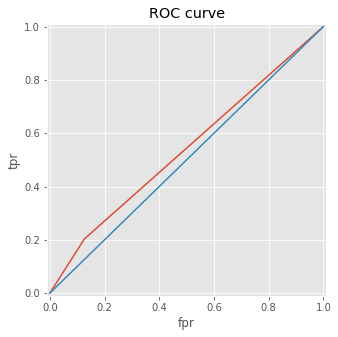

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test_0)

print('precision', precision_score(y_test_0, predict))
print('recall', recall_score(y_test_0, predict))
print('accuracy', accuracy_score(y_test_0, predict))
print('f1', f1_score(y_test_0, predict))

precision 0.15690168818272096
recall 0.18057142857142858
accuracy 0.7899396378269617
f1 0.16790648246546228


(-0.01, 1.01)

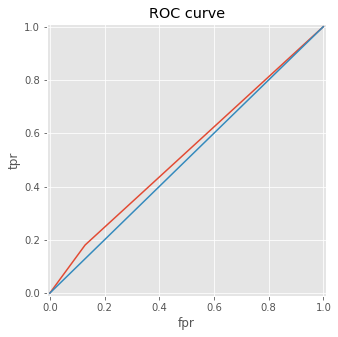

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test_0, predict)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [48]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.32142857142857145
recall 0.016216216216216217
accuracy 0.8762864024523758


C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test_0)

print('precision', precision_score(y_test_0, predict))
print('recall', recall_score(y_test_0, predict))
print('accuracy', accuracy_score(y_test_0, predict))

precision 0.13513513513513514
recall 0.005714285714285714
accuracy 0.8790073775989269


C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
model = LogisticRegression(penalty='l1', C=1, fit_intercept=True)

In [51]:
coefs = np.empty((X.shape[1],))
scores = []

c_range = np.logspace(-3, 3, 10)

for C in c_range:
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(penalty='l1', fit_intercept=True, C=C))
    ])

    model.fit(X_train, y_train)
    
    
    coefs = np.c_[coefs, model.named_steps['clf'].coef_[0]]
    s = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    scores.append(s)

C:\Users\M\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to flo

C:\Users\M\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


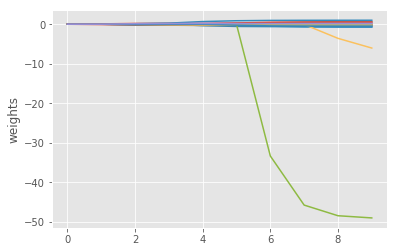

In [52]:
plt.plot(coefs[:, 1:].T)
_ = plt.ylabel('weights')

In [53]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve



In [55]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

(-0.01, 1.01)

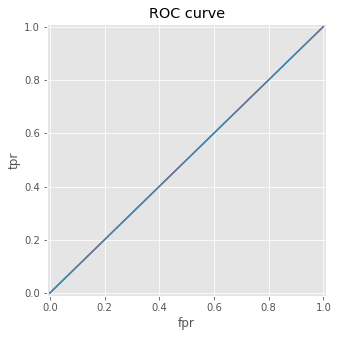

In [56]:
fpr, tpr, thresholds = roc_curve(y_test_0, predict)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)


plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))





In [57]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict_proba(X_test)

C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
predict

array([[0.6, 0.4],
       [0.6, 0.4],
       [0.7, 0.3],
       ...,
       [0.8, 0.2],
       [0.9, 0.1],
       [0.9, 0.1]])

(-0.01, 1.01)

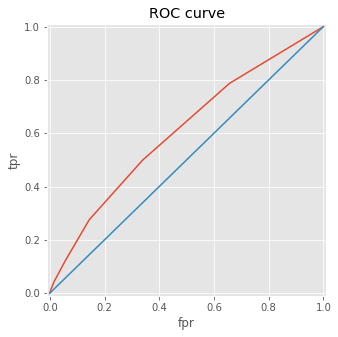

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [61]:
roc_auc_score(y_test, predict[:,1])

0.6075321333297405

In [62]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

In [63]:
rfc = RandomForestClassifier()
res = cross_val_score(
    rfc,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)
average_rocauc = sum(res)/10
print('average_rocauc',average_rocauc)

C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The de

average_rocauc 0.5981699089116986


In [64]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict = 
## Your Code Here

SyntaxError: invalid syntax (<ipython-input-64-32ceb4195326>, line 3)

In [ ]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)